<a href="https://colab.research.google.com/github/mailythompson/BME3053C/blob/main/lessons-solved/unsupervised_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploring Hidden Layer Representations in Neural Networks with PCA and t-SNE


In this assignment, we will investigate how neural networks represent information in their hidden layers, comparing networks with trained versus untrained parameters. Using unsupervised learning techniques, specifically Principal Component Analysis (PCA) and t-SNE, we will visualize the hidden layer outputs in two dimensions.

Through these visualizations, you will explore and analyze two key aspects:
1. The distinctions between PCA and t-SNE as dimensionality reduction techniques.
2. The differences in the learned representations of hidden layers before and after training.

This analysis will help you gain insights into how training affects feature learning and dimensionality reduction. We will use the MNIST dataset for this task, but similar results can be observed with other datasets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import plotly.express as px
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


Missing package: 'plotly'
Installing required packages...
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


##### We will use the MNIST dataset to compare representations in the hidden layers of a neural network. Follow these steps to load, scale, and split the dataset.


In [2]:
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Convert X and y to pandas DataFrames
X = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='label')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


##### The cell below defines a function that creates an MLP (Multi-Layer Perceptron) classifier with preset parameters.

##### **You should use the `get_mlp_classifier()` function below to create the MLP classifiers for this homework.**

The classifier is configured with:
- One hidden layer of 100 neurons
- ReLU activation function
- Adam optimizer
- 20 maximum iterations
- Random state of 42 for reproducibility


In [3]:
def get_mlp_classifier(max_iter=20):
    return MLPClassifier(
        hidden_layer_sizes=(200,),  # One hidden layer with 100 neurons
        activation='relu',
        solver='adam',
        max_iter=max_iter,
        random_state=42,
        verbose=False
)
def get_trained_hidden_layer_outputs():
    # Create and train classifier
    mlp_classifier = get_mlp_classifier()
    mlp_classifier.fit(X_train, y_train)
    
    # Get hidden layer outputs
    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output) 
    return intermediate_output


`get_untrained_hidden_layer_outputs` creates a new classifier and then computes the outputs of the hidden layer with the test set as an input.

The outputs of a neural network hidden layer are intermediate representations of the input data
after being transformed by the layer's weights and activation function. These outputs capture
learned features and patterns from the input data.

The resulting values represent abstract features that the network uses for its final prediction



In [4]:
def get_untrained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier(1)
    single_X=np.random.uniform(0, 1, size=(1, 784))
    single_y=[1]
    single_X = X_train[0:1]  # Take first sample
    single_y = y_train[0:1]  # Take first label

    mlp_classifier.partial_fit(single_X, single_y, classes=np.unique(y_train))



    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output


`get_trained_hidden_layer_outputs` creates a new classifier, trains it on the full training set, and then computes the outputs of the hidden layer with the test set as input.
Similar to the untrained version, this function:
1. Creates an MLPClassifier with default parameters (20 max iterations)
2. Trains the classifier on X_train and y_train using fit()
3. Computes the hidden layer outputs by:
   - Multiplying input data (X_test) with the first layer weights (coefs_[0])
   - Applying ReLU activation (max(0,x)) to the result
The key difference is that this classifier is fully trained, so its hidden layer representations
should be more meaningful for distinguishing between different digit classes.


In [5]:
def get_trained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier()
    # mlp_classifier.fit(single_X, )
    mlp_classifier.fit(X_train, y_train)

    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output

### **Part 1A**
##### Extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




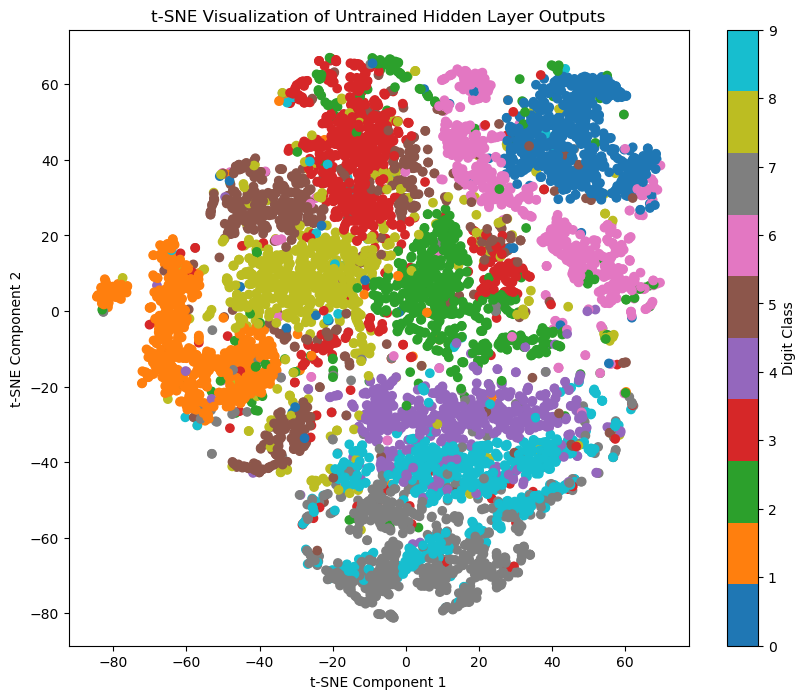

In [6]:
#Provide your code below
# Get hidden layer outputs from untrained classifier
hidden_outputs = get_untrained_hidden_layer_outputs()

# Apply t-SNE to reduce dimensionality to 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(hidden_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE Visualization of Untrained Hidden Layer Outputs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### **Part 1B**
##### Now, extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply PCA instead of t-SNE

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




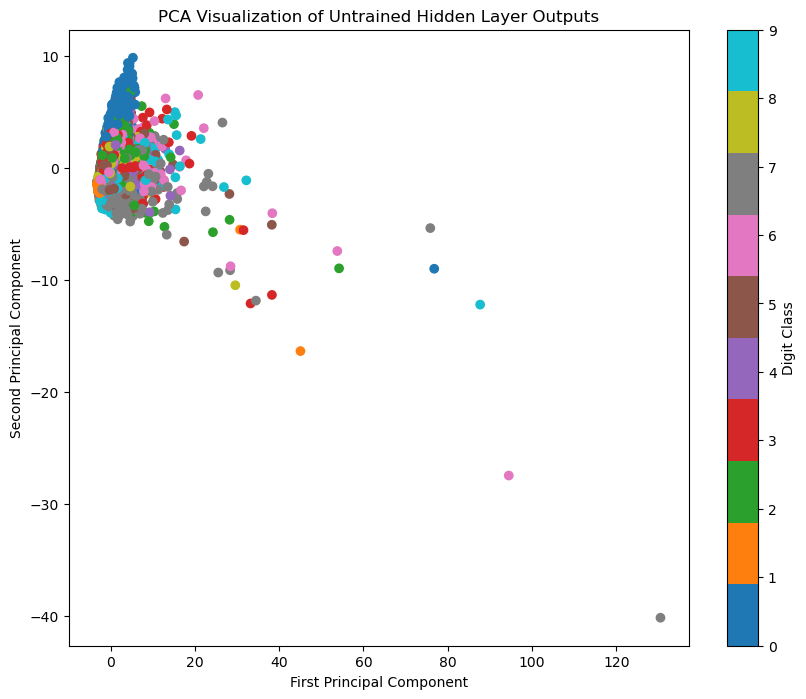

In [7]:
#Provide your code below
# Get hidden layer outputs from untrained classifier
hidden_outputs = get_untrained_hidden_layer_outputs()

# Apply PCA to reduce dimensionality to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(hidden_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA Visualization of Untrained Hidden Layer Outputs')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


### **Part 1C**
#### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE. Provide your response in the cell below.

PCA and t-SNE are both methods for reducing dimensionality, but they differ in how they preserve the data structure. PCA is linear and transforms data by maximizing variance along new axes (i.e. the principal components), preserving the overall global structure. This approach is best when data separation is linear. On the other hand, t-SNE is non-linear and focuses on preserving local relationships. It works by grouping similar points closely and separating different ones, which makes it helpful for visualizing clusters in complex data. However, t-SNE may distort the broader structure, so it’s more useful for exploring data visually than for precise analysis of distances between clusters.

### **Part 2A**
##### Extract the outputs from the hidden layer of a *trained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




/opt/miniconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


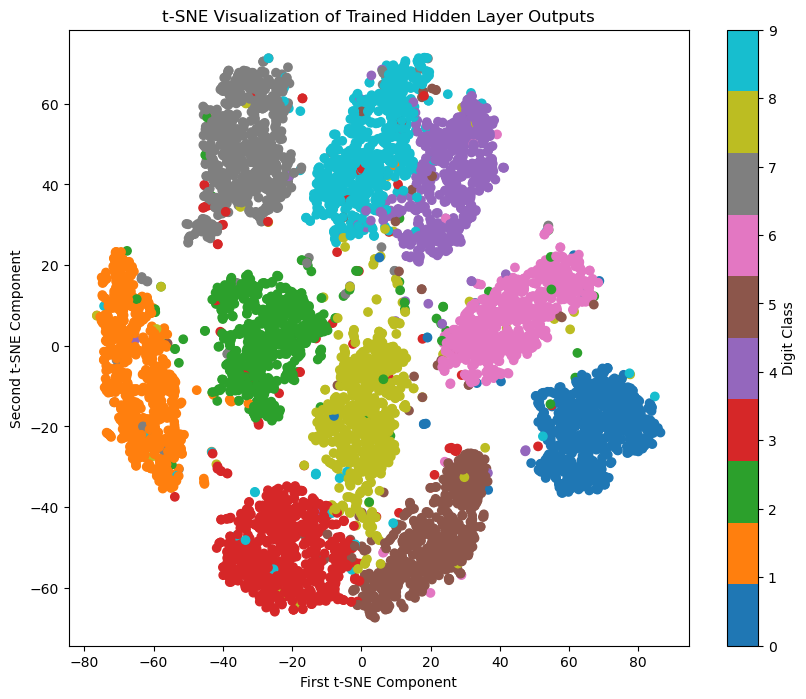

In [8]:
#Provide your code below
# Get hidden layer outputs from trained classifier
hidden_outputs = get_trained_hidden_layer_outputs()

# Apply t-SNE to reduce dimensionality to 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(hidden_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE Visualization of Trained Hidden Layer Outputs')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.show()


### **Part 2B**
##### Extract the outputs from the hidden layer of an *trained* MLPClassifier and apply PCA to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




/opt/miniconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


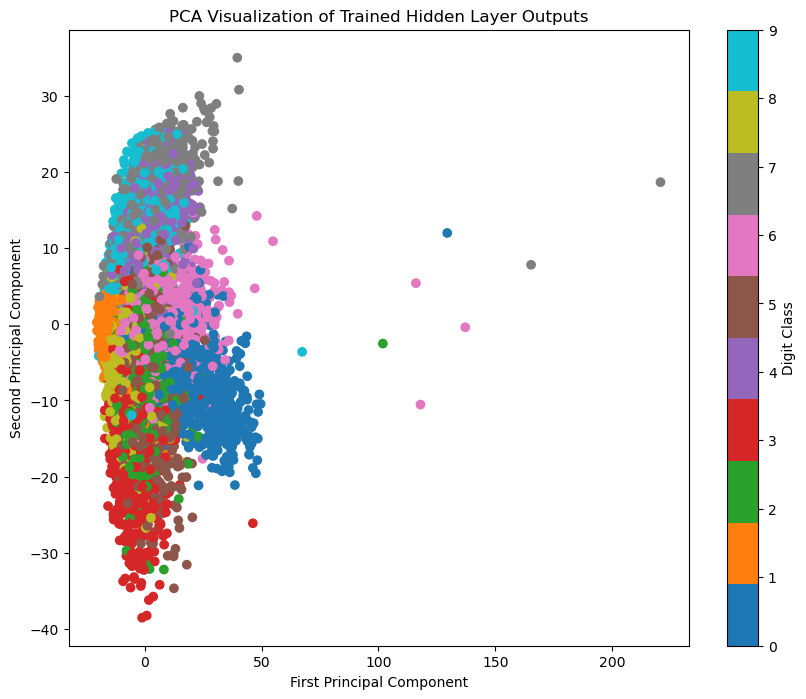

In [9]:
#Provide your code below
# Get hidden layer outputs from trained classifier
hidden_outputs = get_trained_hidden_layer_outputs()

# Apply PCA to reduce dimensionality to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(hidden_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA Visualization of Trained Hidden Layer Outputs')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


### **Part 2C**
##### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE on the trained hidden layer outputs. Provide your response in the cell below.


When using PCA and t-SNE on the hidden layer outputs of a trained neural network, PCA reduces dimensions by keeping the main patterns in a straightforward, linear way, capturing overall trends but missing finer details. t-SNE, however, focuses on keeping nearby points close, making it better at showing small clusters and detailed patterns in the hidden layers. As a result, t-SNE is often more useful for visualizing complex structures in the data, although it can distort the overall arrangement.

### **Part 3**

1. How do the visualizations differ between the trained and untrained hidden layer outputs? What might account for these differences?
2. What differences do you observe between PCA and t-SNE? Why might certain patterns be more pronounced in one method compared to the other?
3. Why might certain clusters or patterns emerge only in the trained model?

Provide your response in the cell below.

1. The trained and untrained visualizations show significant differences:
   Untrained outputs appear more randomly distributed with less distinct clustering. Trained outputs show clearer separation between digit classes. This difference occurs because the trained network has learned to recognize meaningful features that help distinguish between digits, while the untrained network's random weights produce more arbitrary transformations of the input data.

2. Key differences between PCA and t-SNE visualizations:
   PCA shows broader, linear relationships but with more overlap between classes. t-SNE reveals tighter, more distinct clusters with better separation. This occurs because PCA is limited to linear transformations that maximize variance, while t-SNE can capture non-linear relationships by focusing on local structure preservation. t-SNE is particularly good at revealing clusters in high-dimensional data, which is why it shows digit classes more distinctly.

3. Clusters emerge primarily in the trained model because:
   Training optimizes the network weights to extract features that are relevant for digit classification. The hidden layer learns to transform similar inputs (same digit) into similar representations. These learned representations naturally group similar digits together in the feature space. Without training, the random weights don't create meaningful transformations that would separate different digit classes.
   